In [ ]:
!pip install mahotas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.7 MB 13.6 MB/s 


In [ ]:
import pandas as pd #tabel
import matplotlib.pyplot as plt #membuat grafik
import numpy as np #array
import seaborn as sns #conclusion matrix
import mahotas #ekstraksi fitur tekstur
import tensorflow as tf #membuat model deep learninng


from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Activation
from tensorflow.keras import layers, models, optimizers

In [ ]:
# Untuk mounting google drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset = '/content/drive/MyDrive/data impro'
class_names = np.array(tf.io.gfile.listdir(str(dataset)))
print(class_names)

['babi' 'kambing' 'sapi']


In [ ]:
fn_daging = tf.io.gfile.glob(dataset + '/*/*.jpg')
filenames = fn_daging
num_samples = len(filenames)
print('Number of total examples:', num_samples)

Number of total examples: 379


In [ ]:
df = pd.DataFrame(filenames, columns=['filename'])
df

,filename
0,/content/drive/MyDrive/data impro/babi/WIN_202...
1,/content/drive/MyDrive/data impro/babi/WIN_202...
2,/content/drive/MyDrive/data impro/babi/WIN_202...
3,/content/drive/MyDrive/data impro/babi/WIN_202...
4,/content/drive/MyDrive/data impro/babi/WIN_202...
...,...
374,/content/drive/MyDrive/data impro/sapi/WIN_202...
375,/content/drive/MyDrive/data impro/sapi/WIN_202...
376,/content/drive/MyDrive/data impro/sapi/WIN_202...
377,/content/drive/MyDrive/data impro/sapi/WIN_202...


In [ ]:
def get_label(fn):
  parts = fn.split('/')
  label = parts[5]
  return label

In [ ]:
df['label'] = 'a'
for i in range(len(df)):
  path = df.filename.values[i]
  label = get_label(path)
  df['label'].values[i] = label

df

,filename,label
0,/content/drive/MyDrive/data impro/babi/WIN_202...,babi
1,/content/drive/MyDrive/data impro/babi/WIN_202...,babi
2,/content/drive/MyDrive/data impro/babi/WIN_202...,babi
3,/content/drive/MyDrive/data impro/babi/WIN_202...,babi
4,/content/drive/MyDrive/data impro/babi/WIN_202...,babi
...,...,...
374,/content/drive/MyDrive/data impro/sapi/WIN_202...,sapi
375,/content/drive/MyDrive/data impro/sapi/WIN_202...,sapi
376,/content/drive/MyDrive/data impro/sapi/WIN_202...,sapi
377,/content/drive/MyDrive/data impro/sapi/WIN_202...,sapi


In [ ]:
df.label.value_counts()

sapi       151
kambing    128
babi       100
Name: label, dtype: int64

## Segmentasi

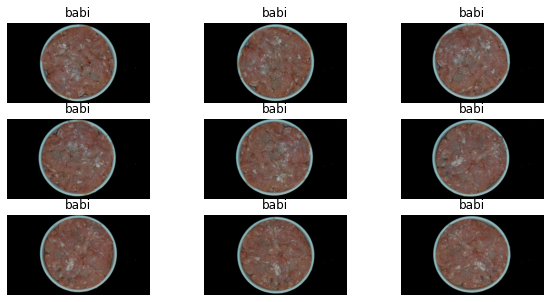

In [ ]:
plt.figure(figsize=(10,5))
for i in range(9):
  image_path = df.filename.values[i]
  img = plt.imread(image_path)
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(img)
  label = df.label.values[i]
  plt.title(label)
  plt.axis("off")

In [ ]:
image_path = df.filename.values[1]
img = plt.imread(image_path)
img.shape


(1080, 1920, 3)

In [ ]:
def segmentation(path):
    img = plt.imread(path)
    segmanted = img[240:840, 660:1260]
    return segmanted

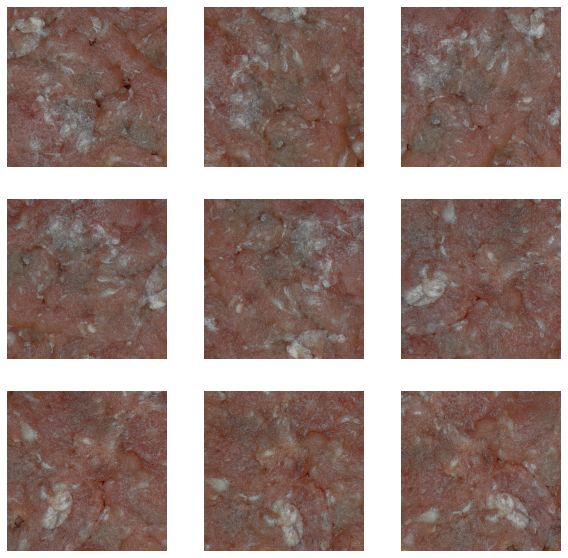

In [ ]:
plt.figure(figsize=(10,10))
for i in range(9):
  image_path = df.filename.values[i]
  masked = segmentation(image_path)
  ax = plt.subplot(3,3, i + 1)
  plt.imshow(masked, cmap='gray')
  plt.axis("off")

##Texture Extraction

In [ ]:
def haralick_features(image):
    return mahotas.features.haralick(image, ignore_zeros=True, compute_14th_feature=True).mean(0)

In [ ]:
df['Angular_Second_Moment'] = 0.0
df['Contrast'] = 0.0
df['Correlation'] = 0.0
df['Variance'] = 0.0
df['Inverse_Different_Moment'] = 0.0
df['Sum_Average'] = 0.0
df['Sum_Variance'] = 0.0
df['Sum_Entropy'] = 0.0
df['Entropy'] = 0.0
df['Difference_Variance'] = 0.0
df['Difference_Entropy'] = 0.0
df['Information_Measures_of_Correlation_1'] = 0.0
df['Information_Measures_of_Correlation_2'] = 0.0
df['Maximal_Correlation_Coefficient'] = 0.0

for i in range(len(df)):
    image_path = df.filename.values[i]
    masked = segmentation(image_path)
    haralicks = haralick_features(masked)
    df['Angular_Second_Moment'].values[i] = haralicks[0]
    df['Contrast'].values[i] = haralicks[1]
    df['Correlation'].values[i] = haralicks[2]
    df['Variance'].values[i] = haralicks[3]
    df['Inverse_Different_Moment'].values[i] = haralicks[4]
    df['Sum_Average'].values[i] = haralicks[5]
    df['Sum_Variance'].values[i] = haralicks[6]
    df['Sum_Entropy'].values[i] = haralicks[7]
    df['Entropy'].values[i] = haralicks[8]
    df['Difference_Variance'].values[i] = haralicks[9]
    df['Difference_Entropy'].values[i] = haralicks[10]
    df['Information_Measures_of_Correlation_1'].values[i] = haralicks[11]
    df['Information_Measures_of_Correlation_2'].values[i] = haralicks[12]
    df['Maximal_Correlation_Coefficient'].values[i] = haralicks[13]

df.head()


,filename,label,Angular_Second_Moment,Contrast,Correlation,Variance,Inverse_Different_Moment,Sum_Average,Sum_Variance,Sum_Entropy,Entropy,Difference_Variance,Difference_Entropy,Information_Measures_of_Correlation_1,Information_Measures_of_Correlation_2,Maximal_Correlation_Coefficient
0,/content/drive/MyDrive/data impro/babi/WIN_202...,babi,0.000161,604.435585,0.537463,659.574746,0.054563,192.857381,2033.863399,7.521154,13.041008,0.000103,5.596135,-0.058088,0.669262,6.818531
1,/content/drive/MyDrive/data impro/babi/WIN_202...,babi,0.000168,597.234612,0.513710,622.004334,0.053356,187.682285,1890.782724,7.466422,12.971751,0.000103,5.579992,-0.055904,0.648797,6.509793
2,/content/drive/MyDrive/data impro/babi/WIN_202...,babi,0.000178,563.697948,0.527123,601.161287,0.057784,196.881213,1840.947201,7.438423,12.914964,0.000105,5.553646,-0.054889,0.653892,6.545528
3,/content/drive/MyDrive/data impro/babi/WIN_202...,babi,0.000174,581.740659,0.522092,614.654825,0.057023,187.919272,1876.878641,7.455149,12.943926,0.000105,5.568079,-0.056107,0.655958,6.514262
4,/content/drive/MyDrive/data impro/babi/WIN_202...,babi,0.000176,562.339138,0.546333,625.929742,0.057195,190.778926,1941.379830,7.475338,12.931521,0.000110,5.538879,-0.060405,0.676505,6.546725


In [ ]:
df.to_csv('/content/drive/MyDrive/Hasil_daging.csv')

In [ ]:
# Untuk membaca data csv

data = pd.read_csv('/content/drive/MyDrive/Hasil_daging.csv')
data

,Unnamed: 0,filename,label,Angular_Second_Moment,Contrast,Correlation,Variance,Inverse_Different_Moment,Sum_Average,Sum_Variance,Sum_Entropy,Entropy,Difference_Variance,Difference_Entropy,Information_Measures_of_Correlation_1,Information_Measures_of_Correlation_2,Maximal_Correlation_Coefficient
0,0,/content/drive/MyDrive/data impro/babi/WIN_202...,babi,0.000161,604.435585,0.537463,659.574746,0.054563,192.857381,2033.863399,7.521154,13.041008,0.000103,5.596135,-0.058088,0.669262,6.818531
1,1,/content/drive/MyDrive/data impro/babi/WIN_202...,babi,0.000168,597.234612,0.513710,622.004334,0.053356,187.682285,1890.782724,7.466422,12.971751,0.000103,5.579992,-0.055904,0.648797,6.509793
2,2,/content/drive/MyDrive/data impro/babi/WIN_202...,babi,0.000178,563.697948,0.527123,601.161287,0.057784,196.881213,1840.947201,7.438423,12.914964,0.000105,5.553646,-0.054889,0.653892,6.545528
3,3,/content/drive/MyDrive/data impro/babi/WIN_202...,babi,0.000174,581.740659,0.522092,614.654825,0.057023,187.919272,1876.878641,7.455149,12.943926,0.000105,5.568079,-0.056107,0.655958,6.514262
4,4,/content/drive/MyDrive/data impro/babi/WIN_202...,babi,0.000176,562.339138,0.546333,625.929742,0.057195,190.778926,1941.379830,7.475338,12.931521,0.000110,5.538879,-0.060405,0.676505,6.546725
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374,374,/content/drive/MyDrive/data impro/sapi/WIN_202...,sapi,0.000102,1476.374484,0.389931,1232.271128,0.055759,175.021721,3452.710027,7.870056,13.784341,0.000069,6.090569,-0.062825,0.655491,6.193642
375,375,/content/drive/MyDrive/data impro/sapi/WIN_202...,sapi,0.000097,1516.182582,0.387457,1251.214077,0.054024,171.239803,3488.673728,7.884676,13.869869,0.000067,6.142535,-0.053888,0.611339,5.930272
376,376,/content/drive/MyDrive/data impro/sapi/WIN_202...,sapi,0.000096,1592.773198,0.373194,1287.485889,0.052959,179.005887,3557.170358,7.892012,13.902700,0.000065,6.168916,-0.053700,0.605175,5.892364
377,377,/content/drive/MyDrive/data impro/sapi/WIN_202...,sapi,0.000098,1528.396923,0.379449,1245.935393,0.053479,178.215941,3455.344647,7.871008,13.862794,0.000067,6.152571,-0.052122,0.598082,5.942701


In [ ]:
# Untuk mengubah label dari string menjadi data numerik
# 0 : sapi murni
# 1 : sapi + adulteran

def getNumber(str):
    if str=="sapi":
        return 0
    elif str=="babi":
        return 1
    elif str=="kambing":
        return 2
data["label"]=data["label"].apply(getNumber)

data

,Unnamed: 0,filename,label,Angular_Second_Moment,Contrast,Correlation,Variance,Inverse_Different_Moment,Sum_Average,Sum_Variance,Sum_Entropy,Entropy,Difference_Variance,Difference_Entropy,Information_Measures_of_Correlation_1,Information_Measures_of_Correlation_2,Maximal_Correlation_Coefficient
0,0,/content/drive/MyDrive/data impro/babi/WIN_202...,1,0.000161,604.435585,0.537463,659.574746,0.054563,192.857381,2033.863399,7.521154,13.041008,0.000103,5.596135,-0.058088,0.669262,6.818531
1,1,/content/drive/MyDrive/data impro/babi/WIN_202...,1,0.000168,597.234612,0.513710,622.004334,0.053356,187.682285,1890.782724,7.466422,12.971751,0.000103,5.579992,-0.055904,0.648797,6.509793
2,2,/content/drive/MyDrive/data impro/babi/WIN_202...,1,0.000178,563.697948,0.527123,601.161287,0.057784,196.881213,1840.947201,7.438423,12.914964,0.000105,5.553646,-0.054889,0.653892,6.545528
3,3,/content/drive/MyDrive/data impro/babi/WIN_202...,1,0.000174,581.740659,0.522092,614.654825,0.057023,187.919272,1876.878641,7.455149,12.943926,0.000105,5.568079,-0.056107,0.655958,6.514262
4,4,/content/drive/MyDrive/data impro/babi/WIN_202...,1,0.000176,562.339138,0.546333,625.929742,0.057195,190.778926,1941.379830,7.475338,12.931521,0.000110,5.538879,-0.060405,0.676505,6.546725
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374,374,/content/drive/MyDrive/data impro/sapi/WIN_202...,0,0.000102,1476.374484,0.389931,1232.271128,0.055759,175.021721,3452.710027,7.870056,13.784341,0.000069,6.090569,-0.062825,0.655491,6.193642
375,375,/content/drive/MyDrive/data impro/sapi/WIN_202...,0,0.000097,1516.182582,0.387457,1251.214077,0.054024,171.239803,3488.673728,7.884676,13.869869,0.000067,6.142535,-0.053888,0.611339,5.930272
376,376,/content/drive/MyDrive/data impro/sapi/WIN_202...,0,0.000096,1592.773198,0.373194,1287.485889,0.052959,179.005887,3557.170358,7.892012,13.902700,0.000065,6.168916,-0.053700,0.605175,5.892364
377,377,/content/drive/MyDrive/data impro/sapi/WIN_202...,0,0.000098,1528.396923,0.379449,1245.935393,0.053479,178.215941,3455.344647,7.871008,13.862794,0.000067,6.152571,-0.052122,0.598082,5.942701


In [ ]:
# Untuk memisahkan antara label (y) dengan fitur (X)

y = data.pop('label')
X = data.iloc[:, 2:]

In [ ]:
y

0      1
1      1
2      1
3      1
4      1
      ..
374    0
375    0
376    0
377    0
378    0
Name: label, Length: 379, dtype: int64

In [ ]:
# Untuk membagi dataset menjadi data training dan data testing

from sklearn.model_selection import train_test_split
train_df, test_df, train_labels, test_labels = train_test_split(X, y,
                                                                test_size = 0.3, random_state = 128, stratify=y)

In [ ]:
X_train_all = np.array(train_df)
X_test_all = np.array(test_df)


y_train = np.array(train_labels)
y_test = np.array(test_labels)

print('Training labels :', y_train.shape)
print('Test labels :', y_test.shape)

print('Training features all:', X_train_all.shape)
print('Test features all:', X_test_all.shape)

Training labels : (265,)
Test labels : (114,)
Training features all: (265, 14)
Test features all: (114, 14)


In [ ]:
# Scaling data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_all = scaler.fit_transform(X_train_all)
X_test_all = scaler.transform(X_test_all)



In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Decision Tree ✔

In [ ]:
clf = DecisionTreeClassifier()

clf = clf.fit(X_train_all, y_train)
y_pred_all = clf.predict(X_test_all)

Accuracy All Features : 0.9649122807017544
Metrix All Features : (array([0.93617021, 1.        , 0.97297297]), array([0.97777778, 1.        , 0.92307692]), array([0.95652174, 1.        , 0.94736842]), array([45, 30, 39]))


<Figure size 360x360 with 0 Axes>

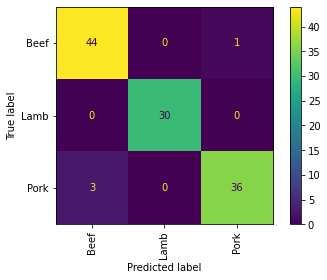

In [ ]:
print("Accuracy All Features :",metrics.accuracy_score(y_test, y_pred_all))
print("Metrix All Features :",metrics.precision_recall_fscore_support(y_test, y_pred_all))

cm_all = confusion_matrix(y_test, y_pred_all)

plt.figure(figsize=(5,5))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_all,
                               display_labels=['Beef','Lamb','Pork'])
disp.plot()
plt.xticks(rotation=90)
plt.show()


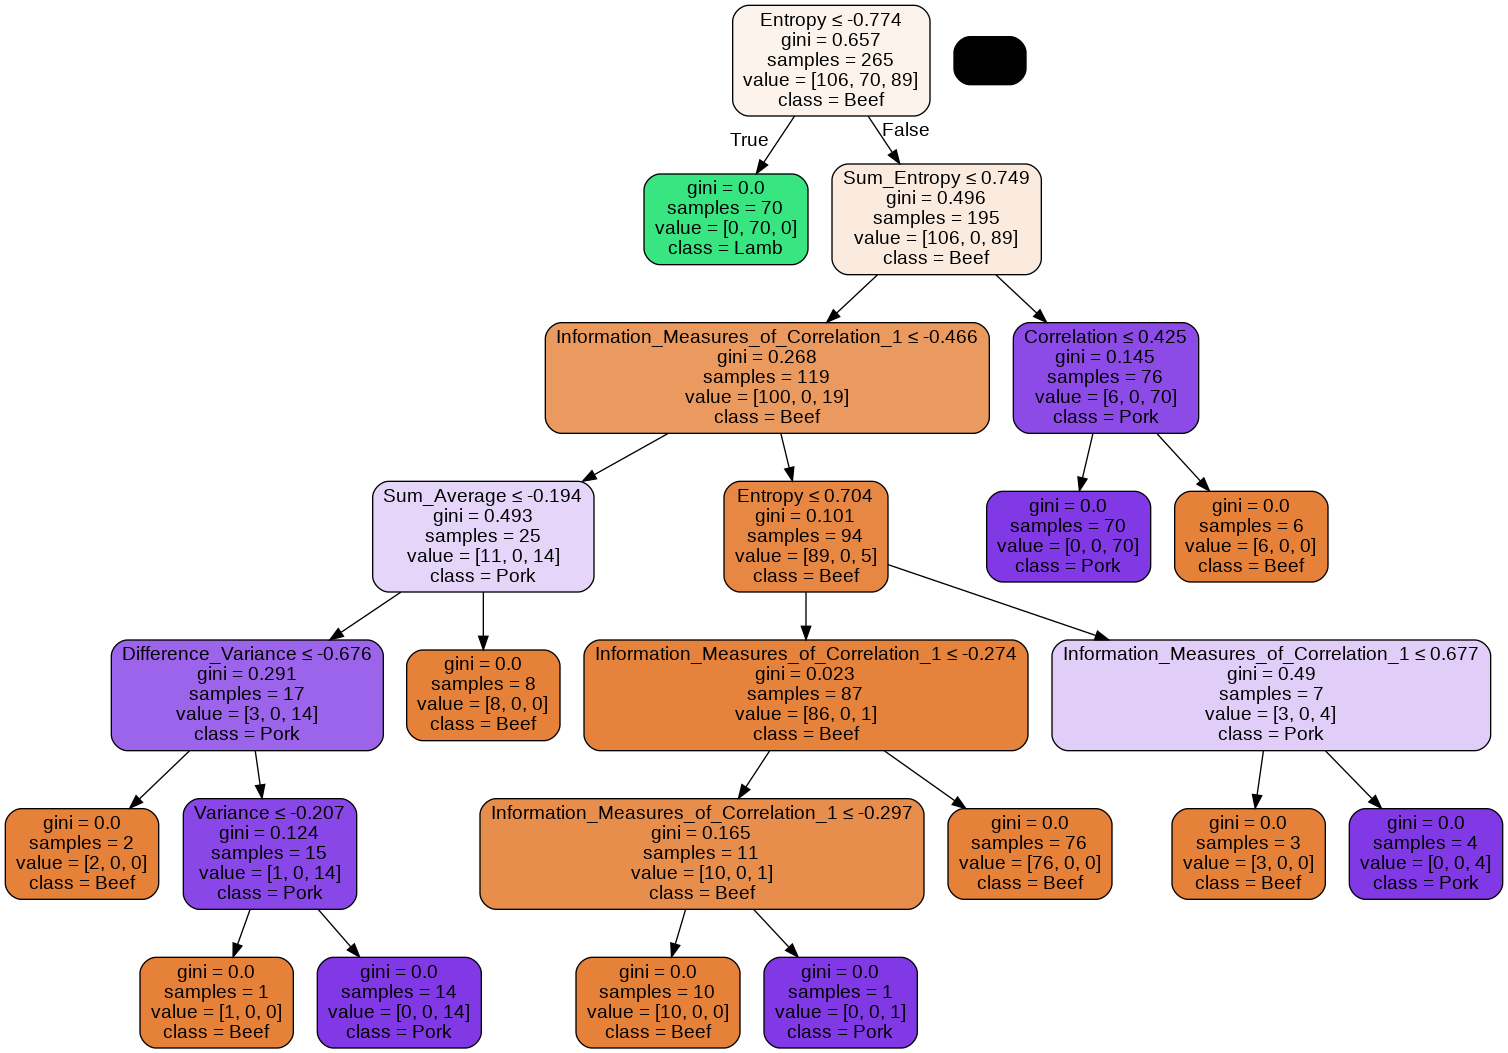

In [ ]:
#Menggambar decision tree
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

feature_cols_all = train_df.columns

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols_all, class_names=['Beef','Lamb','Pork'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('DT_biner_all_features.png')
Image(graph.create_png())

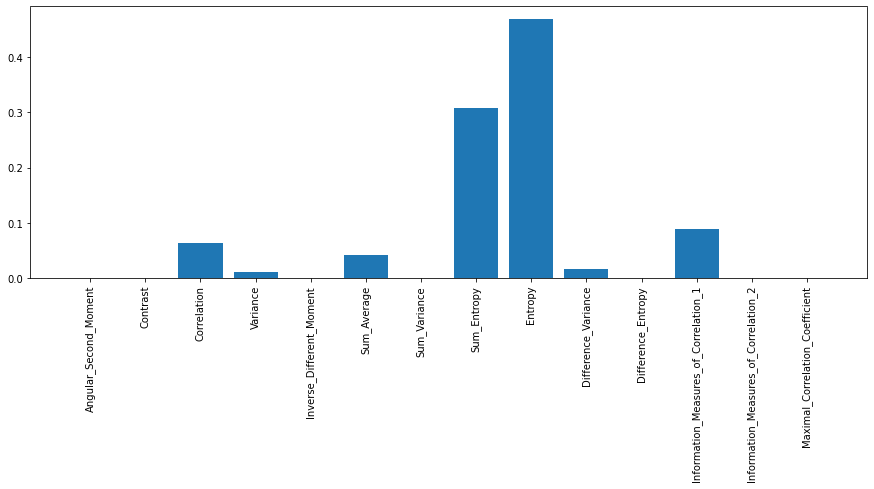

In [ ]:
importance = clf.feature_importances_

# summarize feature importance
#for i,v in enumerate(importance):
#	print('Feature: %0d, Score: %.5f' % (i,v))

def add_value_label(x_list,y_list):
    for i in range(0, len(x_list)):
      if y_list[i] != 0.0:
        plt.text(i,y_list[i],y_list[i], ha="center")

# plot feature importance
plt.figure(figsize=(15,5))
plt.bar(train_df.columns, importance)
#add_value_label(train_df.columns, importance)
plt.xticks(rotation=90)
plt.show()

# Random Forest ✔

## All Features

In [ ]:
#ketik kodingan disini
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier()
clf_rf.fit(X_train_all, y_train)

RandomForestClassifier()

Accuracy All Features : 0.9736842105263158
Metrix All Features : (array([0.9375, 1.    , 1.    ]), array([1.        , 1.        , 0.92307692]), array([0.96774194, 1.        , 0.96      ]), array([45, 30, 39]))


<Figure size 360x360 with 0 Axes>

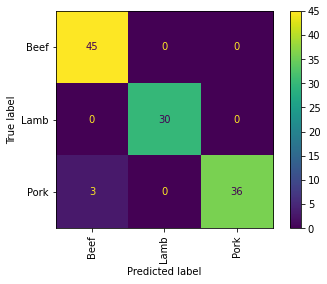

In [ ]:
y_pred = clf_rf.predict(X_test_all)
print("Accuracy All Features :",metrics.accuracy_score(y_test, y_pred))
print("Metrix All Features :",metrics.precision_recall_fscore_support(y_test, y_pred))

cm_all = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,5))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_all,
                               display_labels=['Beef','Lamb','Pork'])
disp.plot()
plt.xticks(rotation=90)
plt.show()



Feature: 0, Score: 0.07580
Feature: 1, Score: 0.08194
Feature: 2, Score: 0.02696
Feature: 3, Score: 0.10821
Feature: 4, Score: 0.01231
Feature: 5, Score: 0.02450
Feature: 6, Score: 0.12150
Feature: 7, Score: 0.12113
Feature: 8, Score: 0.10099
Feature: 9, Score: 0.07031
Feature: 10, Score: 0.09149
Feature: 11, Score: 0.06057
Feature: 12, Score: 0.07132
Feature: 13, Score: 0.03297


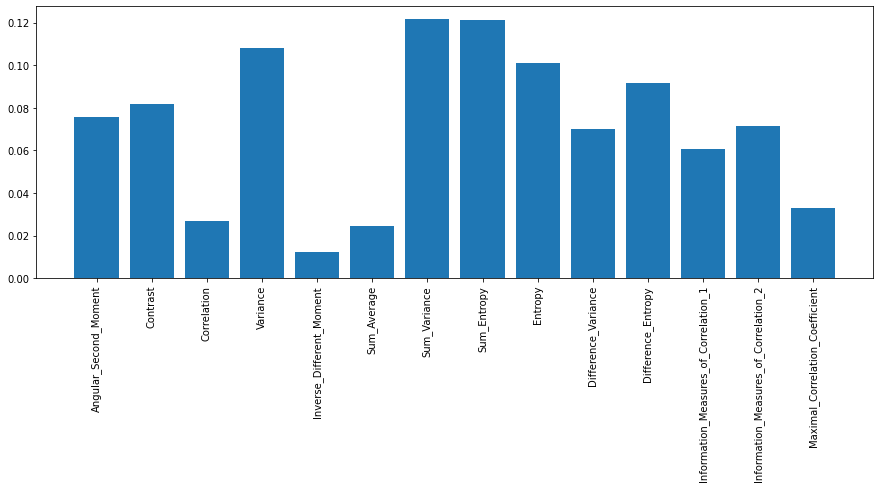

In [ ]:
importance = clf_rf.feature_importances_

# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

def add_value_label(x_list,y_list):
    for i in range(0, len(x_list)):
      if y_list[i] != 0.0:
        plt.text(i,y_list[i]+0.001,round(y_list[i], 3), ha="center")

# plot feature importance
plt.figure(figsize=(15,5))
plt.bar(train_df.columns, importance)
#add_value_label(train_df.columns, importance)
plt.xticks(rotation=90)
plt.show()

# AdaBoost Classifier ✔

Accuracy All Features : 0.9473684210526315
Metrix All Features : (array([0.91489362, 1.        , 0.94594595]), array([0.95555556, 1.        , 0.8974359 ]), array([0.93478261, 1.        , 0.92105263]), array([45, 30, 39]))


<Figure size 360x360 with 0 Axes>

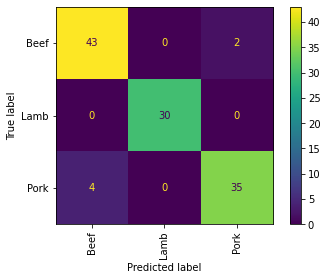

In [ ]:
# ALL FEATURES

from sklearn.ensemble import AdaBoostClassifier

clf_boost = AdaBoostClassifier(clf)
clf_boost.fit(X_train_all, y_train)

y_pred = clf_boost.predict(X_test_all)
print("Accuracy All Features :",metrics.accuracy_score(y_test, y_pred))
print("Metrix All Features :",metrics.precision_recall_fscore_support(y_test, y_pred))

cm_all = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,5))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_all,
                               display_labels=['Beef','Lamb','Pork'])
disp.plot()
plt.xticks(rotation=90)
plt.show()

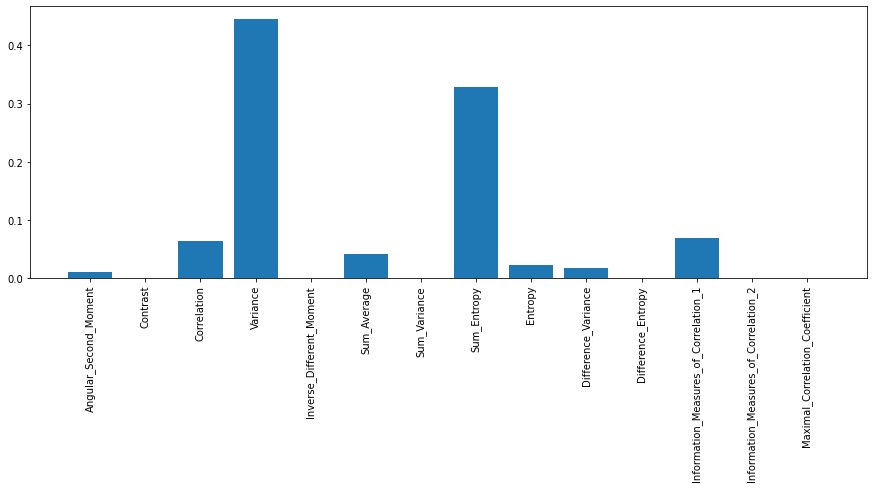

In [ ]:
importance = clf_boost.feature_importances_

# summarize feature importance
#for i,v in enumerate(importance):
	#print('Feature: %0d, Score: %.5f' % (i,v))

def add_value_label(x_list,y_list):
    for i in range(0, len(x_list)):
      if y_list[i] != 0.0:
        plt.text(i,y_list[i]+0.01,round(y_list[i], 5), ha="center")

# plot feature importance
plt.figure(figsize=(15,5))
plt.bar(train_df.columns, importance)
#add_value_label(train_df.columns, importance)
plt.xticks(rotation=90)
plt.show()

# SVM ✔

Accuracy All Features : 0.9736842105263158
Metrix All Features : (array([0.95652174, 1.        , 0.97368421]), array([0.97777778, 1.        , 0.94871795]), array([0.96703297, 1.        , 0.96103896]), array([45, 30, 39]))


<Figure size 360x360 with 0 Axes>

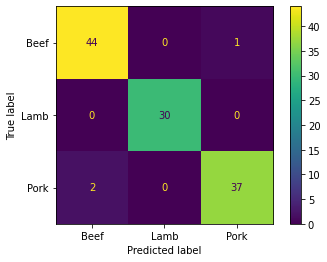

In [ ]:
# ALL FEATURES

from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train_all, y_train)
y_pred = svc.predict(X_test_all)

print("Accuracy All Features :",metrics.accuracy_score(y_test, y_pred))
print("Metrix All Features :",metrics.precision_recall_fscore_support(y_test, y_pred))

cm_all = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,5))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_all,
                               display_labels=['Beef','Lamb','Pork'])
disp.plot()
plt.show()

Feature: 0, Score: 0.08000
Feature: 1, Score: -0.00226
Feature: 2, Score: 0.00755
Feature: 3, Score: 0.00151
Feature: 4, Score: 0.01132
Feature: 5, Score: 0.02113
Feature: 6, Score: 0.00226
Feature: 7, Score: 0.05208
Feature: 8, Score: 0.06642
Feature: 9, Score: 0.01660
Feature: 10, Score: 0.00151
Feature: 11, Score: 0.12906
Feature: 12, Score: 0.01208
Feature: 13, Score: 0.03019


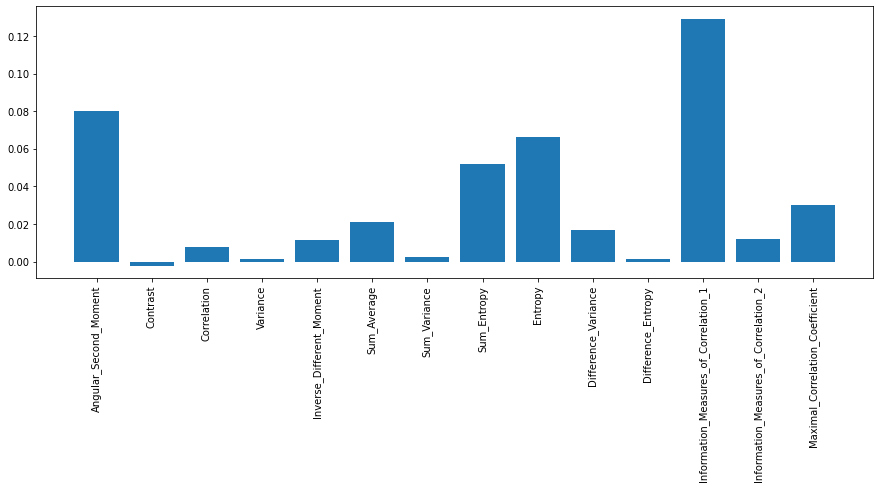

In [ ]:
from sklearn.inspection import permutation_importance

results = permutation_importance(svc, X_train_all, y_train, scoring='accuracy')

importance = results.importances_mean

# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

def add_value_label(x_list,y_list):
    for i in range(0, len(x_list)):
      if y_list[i] != 0.0:
        plt.text(i,y_list[i]+0.01,round(y_list[i], 5), ha="center")

# plot feature importance
plt.figure(figsize=(15,5))
plt.bar(train_df.columns, importance)
#add_value_label(train_df.columns, importance)
plt.xticks(rotation=90)
plt.show()

# KNN ✔

Accuracy: 0.9824561403508771
Metrix All Features : (array([1.        , 1.        , 0.95121951]), array([0.95555556, 1.        , 1.        ]), array([0.97727273, 1.        , 0.975     ]), array([45, 30, 39]))


<Figure size 360x360 with 0 Axes>

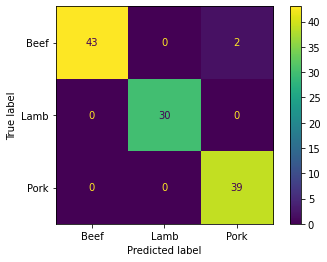

In [ ]:
# ALL FEATURES

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3).fit(X_train_all, y_train)
y_pred = knn.predict(X_test_all)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Metrix All Features :",metrics.precision_recall_fscore_support(y_test, y_pred))

cm_all = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,5))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_all,
                               display_labels=['Beef','Lamb','Pork'])
disp.plot()
plt.show()

Feature: 0, Score: 0.02642
Feature: 1, Score: 0.01283
Feature: 2, Score: 0.04981
Feature: 3, Score: 0.00528
Feature: 4, Score: 0.02642
Feature: 5, Score: 0.02642
Feature: 6, Score: 0.00981
Feature: 7, Score: 0.01736
Feature: 8, Score: 0.01509
Feature: 9, Score: 0.00528
Feature: 10, Score: 0.00453
Feature: 11, Score: 0.03774
Feature: 12, Score: 0.00981
Feature: 13, Score: 0.03547


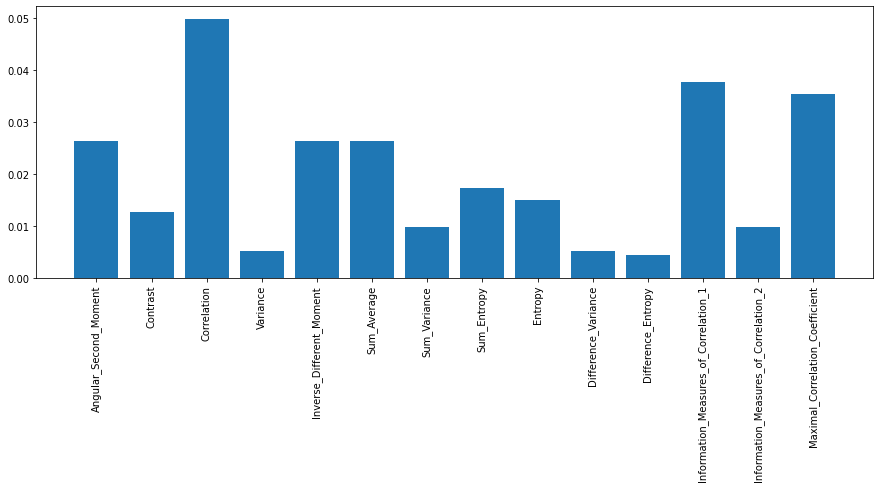

In [ ]:
from sklearn.inspection import permutation_importance

results = permutation_importance(knn, X_train_all, y_train, scoring='accuracy')

importance = results.importances_mean

# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

# plot feature importance
plt.figure(figsize=(15,5))
plt.bar(train_df.columns, importance)
#add_value_label(train_df.columns, importance)
plt.xticks(rotation=90)
plt.show()

# Logistic Regression ✔

Accuracy: 0.9824561403508771
Metrix All Features : (array([0.97777778, 1.        , 0.97435897]), array([0.97777778, 1.        , 0.97435897]), array([0.97777778, 1.        , 0.97435897]), array([45, 30, 39]))


<Figure size 360x360 with 0 Axes>

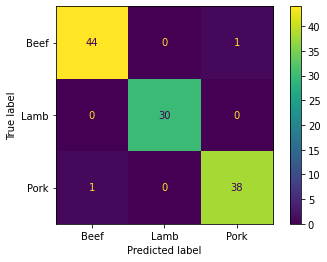

In [ ]:
# ALL FEATURES

from sklearn.linear_model import LogisticRegression

reg = LogisticRegression()
reg.fit(X_train_all, y_train)
y_pred = reg.predict(X_test_all)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Metrix All Features :",metrics.precision_recall_fscore_support(y_test, y_pred))

cm_all = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,5))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_all,
                               display_labels=['Beef','Lamb','Pork'])
disp.plot()
plt.show()

Feature: 0, Score: 0.11774
Feature: 1, Score: 0.00528
Feature: 2, Score: 0.00755
Feature: 3, Score: 0.00075
Feature: 4, Score: -0.00075
Feature: 5, Score: 0.02415
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.08604
Feature: 8, Score: 0.11623
Feature: 9, Score: 0.12000
Feature: 10, Score: 0.01736
Feature: 11, Score: 0.24604
Feature: 12, Score: -0.00075
Feature: 13, Score: 0.05887


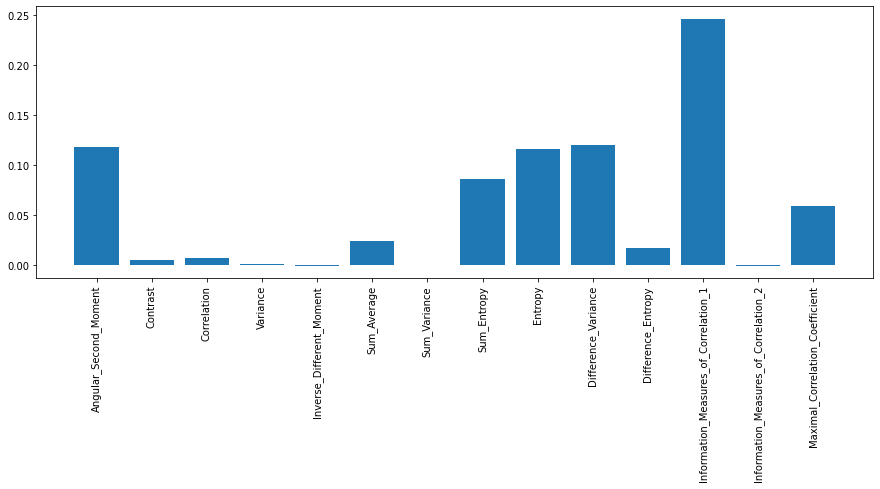

In [ ]:
from sklearn.inspection import permutation_importance

results = permutation_importance(reg, X_train_all, y_train, scoring='accuracy')

importance = results.importances_mean

# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

# plot feature importance
plt.figure(figsize=(15,5))
plt.bar(train_df.columns, importance)
#add_value_label(train_df.columns, importance)
plt.xticks(rotation=90)
plt.show()